#### This is Owen Monroe's Jupyter Notebook for IS-567 Text Mining Homework Assignment 4
October 22, 2023

Word Embeddings 1. Create Your Own Word Embeddings

In [4]:
import pandas as pd
import numpy
import gensim
import nltk
import re
from gensim.models import Word2Vec, KeyedVectors, FastText
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import datapath

In [5]:
# Importing the data 

null_fairytale_df = pd.read_csv('fairy_tale.csv')
null_fairytale_df

/var/folders/8c/38d5fhqx2_jf385d_b3cq3j00000gn/T/ipykernel_7184/1330886115.py:3: DtypeWarning: Columns (4,5,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192) have mixed types. Specify dtype option on import or set low_memory=False.
  null_fairytale_df = pd.read_csv('fairy_tale.csv')


fairy_tale country character  gender count_of_appearance  \
0               cannetella     NaN      wife  female                   3   
1               cannetella     NaN      heir    male                   3   
2               cannetella     NaN      king    male                  21   
3               cannetella     NaN       man    male                  18   
4               cannetella     NaN     slave    male                   1   
...                    ...     ...       ...     ...                 ...   
6536  the_golden_blackbird     NaN    master    male                   3   
6537  the_golden_blackbird     NaN    father    male                   7   
6538  the_golden_blackbird     NaN   brother    male                  10   
6539  the_golden_blackbird     NaN      girl  female                   1   
6540  the_golden_blackbird     NaN       son    male                   8   

     if_main(>=20)                                          sentences  \
0                0  but at last, after he had been married for man...   
1                0  the king, who felt himself growing old and fee...   
2                1  there was once upon a time a king who reigned ...   
3                0  but at last, after he had been married for man...   
4                0  it is enough that i am once more with you, and...   
...            ...                                                ...   
6536             0  ?€?good gracious!?€? exclaimed the master, ?€?...   
6537             0  my father is old, and if he dies i shall inher...   
6538             0  the youth took the same direction as his broth...   
6539             0  the porcelain maiden is a young girl, beautifu...   
6540             0  once upon a time there was a great lord who ha...   

                                         sentences_list Unnamed: 8 Unnamed: 9  \
0     ['but at last, after he had been married for m...        NaN        NaN   
1     ['the king, who felt himself growing old and f...        NaN        NaN   
2     ['there was once upon a time a king who reigne...        NaN        NaN   
3     ['but at last, after he had been married for m...        NaN        NaN   
4     ['it is enough that i am once more with you, a...        NaN        NaN   
...                                                 ...        ...        ...   
6536  ['?€?good gracious!?€? exclaimed the master, ?...        NaN        NaN   
6537  ['my father is old, and if he dies i shall inh...        NaN        NaN   
6538  ['the youth took the same direction as his bro...        NaN        NaN   
6539  ['the porcelain maiden is a young girl, beauti...        NaN        NaN   
6540  ['once upon a time there was a great lord who ...        NaN        NaN   

      ... Unnamed: 183 Unnamed: 184 Unnamed: 185 Unnamed: 186 Unnamed: 187  \
0     ...          NaN          NaN          NaN          NaN          NaN   
1     ...          NaN          NaN          NaN          NaN          NaN   
2     ...          NaN          NaN          NaN          NaN          NaN   
3     ...          NaN          NaN          NaN          NaN          NaN   
4     ...          NaN          NaN          NaN          NaN          NaN   
...   ...          ...          ...          ...          ...          ...   
6536  ...          NaN          NaN          NaN          NaN          NaN   
6537  ...          NaN          NaN          NaN          NaN          NaN   
6538  ...          NaN          NaN          NaN          NaN          NaN   
6539  ...          NaN          NaN          NaN          NaN          NaN   
6540  ...          NaN          NaN          NaN          NaN          NaN   

     Unnamed: 188 Unnamed: 189 Unnamed: 190 Unnamed: 191 Unnamed: 192  
0             NaN          NaN          NaN          NaN          NaN  
1             NaN          NaN          NaN          NaN          NaN  
2             NaN          NaN          NaN          NaN          NaN  
3             NaN          N

In [6]:
# Subsetting the Data

fairytail_df = null_fairytale_df.dropna(subset=['sentences'])

In [7]:
fairytail_df

fairy_tale country character  gender count_of_appearance  \
0               cannetella     NaN      wife  female                   3   
1               cannetella     NaN      heir    male                   3   
2               cannetella     NaN      king    male                  21   
3               cannetella     NaN       man    male                  18   
4               cannetella     NaN     slave    male                   1   
...                    ...     ...       ...     ...                 ...   
6536  the_golden_blackbird     NaN    master    male                   3   
6537  the_golden_blackbird     NaN    father    male                   7   
6538  the_golden_blackbird     NaN   brother    male                  10   
6539  the_golden_blackbird     NaN      girl  female                   1   
6540  the_golden_blackbird     NaN       son    male                   8   

     if_main(>=20)                                          sentences  \
0                0  but at last, after he had been married for man...   
1                0  the king, who felt himself growing old and fee...   
2                1  there was once upon a time a king who reigned ...   
3                0  but at last, after he had been married for man...   
4                0  it is enough that i am once more with you, and...   
...            ...                                                ...   
6536             0  ?€?good gracious!?€? exclaimed the master, ?€?...   
6537             0  my father is old, and if he dies i shall inher...   
6538             0  the youth took the same direction as his broth...   
6539             0  the porcelain maiden is a young girl, beautifu...   
6540             0  once upon a time there was a great lord who ha...   

                                         sentences_list Unnamed: 8 Unnamed: 9  \
0     ['but at last, after he had been married for m...        NaN        NaN   
1     ['the king, who felt himself growing old and f...        NaN        NaN   
2     ['there was once upon a time a king who reigne...        NaN        NaN   
3     ['but at last, after he had been married for m...        NaN        NaN   
4     ['it is enough that i am once more with you, a...        NaN        NaN   
...                                                 ...        ...        ...   
6536  ['?€?good gracious!?€? exclaimed the master, ?...        NaN        NaN   
6537  ['my father is old, and if he dies i shall inh...        NaN        NaN   
6538  ['the youth took the same direction as his bro...        NaN        NaN   
6539  ['the porcelain maiden is a young girl, beauti...        NaN        NaN   
6540  ['once upon a time there was a great lord who ...        NaN        NaN   

      ... Unnamed: 183 Unnamed: 184 Unnamed: 185 Unnamed: 186 Unnamed: 187  \
0     ...          NaN          NaN          NaN          NaN          NaN   
1     ...          NaN          NaN          NaN          NaN          NaN   
2     ...          NaN          NaN          NaN          NaN          NaN   
3     ...          NaN          NaN          NaN          NaN          NaN   
4     ...          NaN          NaN          NaN          NaN          NaN   
...   ...          ...          ...          ...          ...          ...   
6536  ...          NaN          NaN          NaN          NaN          NaN   
6537  ...          NaN          NaN          NaN          NaN          NaN   
6538  ...          NaN          NaN          NaN          NaN          NaN   
6539  ...          NaN          NaN          NaN          NaN          NaN   
6540  ...          NaN          NaN          NaN          NaN          NaN   

     Unnamed: 188 Unnamed: 189 Unnamed: 190 Unnamed: 191 Unnamed: 192  
0             NaN          NaN          NaN          NaN          NaN  
1             NaN          NaN          NaN          NaN          NaN  
2             NaN          NaN          NaN          NaN          NaN  
3             NaN          N

In [8]:
# Tokenizing the Sentences column to create word embeddings 

sentences_list=[]

for line in fairytail_df['sentences']:
    line = line.lower()  
    words = re.findall(r'\b\w+\b', line)  
    sentences_list.append(words)

In [9]:
# Creating a SKIP GRAM word embedding

model_fairy_skip = Word2Vec(
        sentences_list,
        vector_size=300,
        window=5,
        min_count=1,
        sg=1)

In [10]:
# Top 20 most similar words to Man, Woman, King, Queen for SKIP GRAM word embeddings 

sim_skip_man = model_fairy_skip.wv.most_similar('man', topn=20)

sim_skip_woman = model_fairy_skip.wv.most_similar('woman', topn=20)

sim_skip_king = model_fairy_skip.wv.most_similar('king', topn=20)

sim_skip_queen = model_fairy_skip.wv.most_similar('queen', topn=20)

print('Top 20 Similar Words for SKIP GRAM Word Embedding')
print()
print(f'Top 20 Similar to Man: {sim_skip_man}')
print()
print(f'Top 20 Similar to Woman: {sim_skip_woman}')
print()
print(f'Top 20 Similar to King: {sim_skip_king}')
print()
print(f'Top 20 Similar to Queen: {sim_skip_queen}')

Top 20 Similar Words for SKIP GRAM Word Embedding

Top 20 Similar to Man: [('traveller', 0.5648682713508606), ('rascals', 0.5604193806648254), ('woodcutter', 0.5457444190979004), ('weaver', 0.5453584790229797), ('cobbler', 0.5409088730812073), ('butler', 0.5371379256248474), ('burner', 0.5355568528175354), ('labourer', 0.5348145961761475), ('traveler', 0.5310453772544861), ('hist', 0.530016303062439), ('mending', 0.5286340713500977), ('driver', 0.5278970003128052), ('genteel', 0.5276641845703125), ('buffalo', 0.5273578763008118), ('bearded', 0.5243244171142578), ('stan', 0.5222711563110352), ('lean', 0.5211334824562073), ('lanillis', 0.5189611911773682), ('morraha', 0.5182186961174011), ('tough', 0.5181753039360046)]

Top 20 Similar to Woman: [('old', 0.6027748584747314), ('butler', 0.5502613186836243), ('hag', 0.548517107963562), ('toad', 0.5271282196044922), ('deceitful', 0.5161734819412231), ('lassie', 0.5066479444503784), ('dame', 0.506580114364624), ('sorceress', 0.505623996257782

In [11]:
# Creating a CBOW word embedding

model_fairy_cbow = Word2Vec(
        sentences_list,
        vector_size=300,
        window=5,
        min_count=1,
        sg=0)

In [12]:
# Top 20 most similar words to Man, Woman, King, Queen for CBOW word embeddings 

sim_cbow_man = model_fairy_cbow.wv.most_similar('man', topn=20)

sim_cbow_woman = model_fairy_cbow.wv.most_similar('woman', topn=20)

sim_cbow_king = model_fairy_cbow.wv.most_similar('king', topn=20)

sim_cbow_queen = model_fairy_cbow.wv.most_similar('queen', topn=20)

print('Top 20 Similar Words for SKIP GRAM Word Embedding')
print()
print(f'Top 20 Similar to Man: {sim_cbow_man}')
print()
print(f'Top 20 Similar to Woman: {sim_cbow_woman}')
print()
print(f'Top 20 Similar to King: {sim_cbow_king}')
print()
print(f'Top 20 Similar to Queen: {sim_cbow_queen}')

Top 20 Similar Words for SKIP GRAM Word Embedding

Top 20 Similar to Man: [('gentleman', 0.7554348111152649), ('fellow', 0.7415446043014526), ('woman', 0.6583961248397827), ('wolf', 0.6425800323486328), ('farmer', 0.6307517290115356), ('shepherd', 0.6192904710769653), ('negro', 0.6168641448020935), ('lad', 0.6125320792198181), ('manito', 0.6009477376937866), ('magician', 0.5998837351799011), ('dame', 0.589084267616272), ('hag', 0.5723130106925964), ('housekeeper', 0.5627340078353882), ('ogre', 0.5575090050697327), ('stranger', 0.5573475956916809), ('dwarf', 0.5531362295150757), ('playmate', 0.5483407974243164), ('spitfire', 0.5458269715309143), ('seegwun', 0.5433942079544067), ('couple', 0.5418369174003601)]

Top 20 Similar to Woman: [('witch', 0.8280649185180664), ('nurse', 0.74067223072052), ('dame', 0.7357672452926636), ('hag', 0.7276155352592468), ('manito', 0.6661369204521179), ('man', 0.6583961248397827), ('boyard', 0.6384069323539734), ('eric', 0.6303020715713501), ('birscha', 0

In [13]:
# Creating a FASTTEXT word embedding Model

model_fairy_fast = FastText(
        sentences_list,
        vector_size=300,
        window=5,
        min_count=1,
        sg=1)

In [14]:
# Top 20 most similar words to Man, Woman, King, Queen for FASTTEXT word embeddings 

sim_fast_man = model_fairy_fast.wv.most_similar('man', topn=20)

sim_fast_woman = model_fairy_fast.wv.most_similar('woman', topn=20)

sim_fast_king = model_fairy_fast.wv.most_similar('king', topn=20)

sim_fast_queen = model_fairy_fast.wv.most_similar('queen', topn=20)

print('Top 20 Similar Words for SKIP GRAM Word Embedding')
print()
print(f'Top 20 Similar to Man: {sim_fast_man}')
print()
print(f'Top 20 Similar to Woman: {sim_fast_woman}')
print()
print(f'Top 20 Similar to King: {sim_fast_king}')
print()
print(f'Top 20 Similar to Queen: {sim_fast_queen}')

Top 20 Similar Words for SKIP GRAM Word Embedding

Top 20 Similar to Man: [('lawman', 0.7394480109214783), ('lyman', 0.7292312979698181), ('bergman', 0.7216910123825073), ('zaman', 0.7127363085746765), ('roman', 0.7025920748710632), ('marksman', 0.6801709532737732), ('dorman', 0.6740289330482483), ('milkman', 0.6727207899093628), ('bugleman', 0.6677258014678955), ('hangman', 0.6594233512878418), ('ferryman', 0.65864497423172), ('madman', 0.6538141965866089), ('manu', 0.6460553407669067), ('craftsman', 0.6439477801322937), ('footman', 0.640132486820221), ('woodman', 0.6364424228668213), ('german', 0.6344926953315735), ('kinsman', 0.6335020065307617), ('mussulman', 0.6322410702705383), ('gintleman', 0.6297188401222229)]

Top 20 Similar to Woman: [('womanhood', 0.8060683012008667), ('roman', 0.7827118039131165), ('womanish', 0.7809832096099854), ('washerwoman', 0.7668890357017517), ('gentlewoman', 0.7556684017181396), ('lyman', 0.6435827016830444), ('milkman', 0.6037195920944214), ('bergm

Word Embeddings 2. Use pretrained word embeddings

In [15]:
new_glove_file="glove.6B.100d.100K.txt"
new_glove_in_w2v_format="glove.6B.100d.100K.w2v.txt"
_ = glove2word2vec(new_glove_file, new_glove_in_w2v_format)

/var/folders/8c/38d5fhqx2_jf385d_b3cq3j00000gn/T/ipykernel_7184/3682226210.py:3: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  _ = glove2word2vec(new_glove_file, new_glove_in_w2v_format)


In [16]:
new_glove = KeyedVectors.load_word2vec_format('glove.6B.100d.100K.w2v.txt', binary=False)

In [17]:
# Top 20 most similar words to Man, Woman, King, Queen for GLOVE word embeddings 

sim_glove_man = new_glove.most_similar('man', topn=20)

sim_glove_woman = new_glove.most_similar('woman', topn=20)

sim_glove_king = new_glove.most_similar('king', topn=20)

sim_glove_queen = new_glove.most_similar('queen', topn=20)

print('Top 20 Similar Words for GLOVE Word Embeddings')
print()
print(f'Top 20 Similar to Man: {sim_glove_man}')
print()
print(f'Top 20 Similar to Woman: {sim_glove_woman}')
print()
print(f'Top 20 Similar to King: {sim_glove_king}')
print()
print(f'Top 20 Similar to Queen: {sim_glove_queen}')

Top 20 Similar Words for GLOVE Word Embeddings

Top 20 Similar to Man: [('woman', 0.832349419593811), ('boy', 0.7914870977401733), ('one', 0.7788748741149902), ('person', 0.7526816725730896), ('another', 0.752223551273346), ('old', 0.7409117221832275), ('life', 0.7371697425842285), ('father', 0.7370322942733765), ('turned', 0.7347694635391235), ('who', 0.734551191329956), ('whose', 0.7326126098632812), ('girl', 0.7291691303253174), ('he', 0.7255576252937317), ('him', 0.7238516211509705), ('young', 0.7218635082244873), ('himself', 0.7214202284812927), ('friend', 0.7170529365539551), ('once', 0.7132790684700012), ('being', 0.7123121023178101), ('a', 0.7093364000320435)]

Top 20 Similar to Woman: [('girl', 0.8472671508789062), ('man', 0.8323494791984558), ('mother', 0.827568769454956), ('boy', 0.7720510959625244), ('she', 0.7632068395614624), ('child', 0.7601761817932129), ('wife', 0.7505022287368774), ('her', 0.7445705533027649), ('herself', 0.7426273822784424), ('daughter', 0.7264456152

Topic Modeling 1: Data Preprocessing

In [18]:
# Creating one DataFrame for Male Characters and one DataFrame for Female Characters

m_fairytale_df = fairytail_df[fairytail_df['gender'] == 'male']

f_fairytale_df = fairytail_df[fairytail_df['gender'] == 'female']

In [19]:
m_char_count = m_fairytale_df['character'].count()

f_char_count = f_fairytale_df['character'].count()

print(f'Male Character Count: {m_char_count}')
print(f'Female Character Count {f_char_count}')

Male Character Count: 4403
Female Character Count 2125


/Users/owenmonroe/anaconda3/envs/textminingvis/lib/python3.9/site-packages/matplotlib/__init__.py:152: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
/Users/owenmonroe/anaconda3/envs/textminingvis/lib/python3.9/site-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/owenmonroe/anaconda3/envs/textminingvis/lib/python3.9/site-packages/matplotlib/__init__.py:152: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
/Users/owenmonroe/anaconda3/envs/textminingvis/lib/python3.9/site-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/owenmonroe/anaconda3/envs/textmin

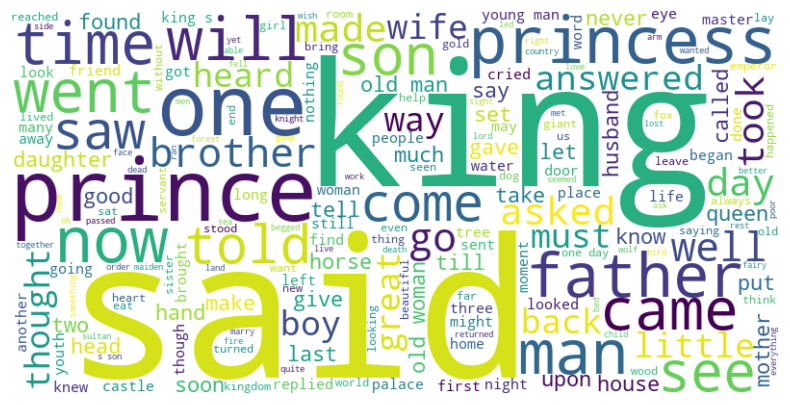

In [20]:
# Creating a Word Cloud for Sentences for Male Characters

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(m_fairytale_df['sentences']))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.show()

In [21]:
# Preparing Male Character DataFrame for LDA Analysis 

#Cleaning Text to just words


m_fairytale_df['Cleaned Sentences'] = m_fairytale_df['sentences'].str.replace(r'[^A-Za-z0-9_ ]+', '', regex=True)

/var/folders/8c/38d5fhqx2_jf385d_b3cq3j00000gn/T/ipykernel_7184/3512405701.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_fairytale_df['Cleaned Sentences'] = m_fairytale_df['sentences'].str.replace(r'[^A-Za-z0-9_ ]+', '', regex=True)


In [22]:

# Tokenizing with NLTK
from nltk.tokenize import word_tokenize  

m_fairytale_df['NLTK Tokenized Sentences'] = m_fairytale_df['Cleaned Sentences'].apply(nltk.word_tokenize)


/var/folders/8c/38d5fhqx2_jf385d_b3cq3j00000gn/T/ipykernel_7184/3765440218.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_fairytale_df['NLTK Tokenized Sentences'] = m_fairytale_df['Cleaned Sentences'].apply(nltk.word_tokenize)


In [23]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(word_list):
    return [word for word in word_list if word not in stop_words]

In [24]:

m_fairytale_df['StopwordRemoved Sentences'] = m_fairytale_df['NLTK Tokenized Sentences'].apply(remove_stopwords)



/var/folders/8c/38d5fhqx2_jf385d_b3cq3j00000gn/T/ipykernel_7184/3389979546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_fairytale_df['StopwordRemoved Sentences'] = m_fairytale_df['NLTK Tokenized Sentences'].apply(remove_stopwords)


In [25]:
m_fairytale_df

fairy_tale country character gender count_of_appearance  \
1               cannetella     NaN      heir   male                   3   
2               cannetella     NaN      king   male                  21   
3               cannetella     NaN       man   male                  18   
4               cannetella     NaN     slave   male                   1   
5               cannetella     NaN   husband   male                   9   
...                    ...     ...       ...    ...                 ...   
6535  the_golden_blackbird     NaN      lord   male                   4   
6536  the_golden_blackbird     NaN    master   male                   3   
6537  the_golden_blackbird     NaN    father   male                   7   
6538  the_golden_blackbird     NaN   brother   male                  10   
6540  the_golden_blackbird     NaN       son   male                   8   

     if_main(>=20)                                          sentences  \
1                0  the king, who felt himself growing old and fee...   
2                1  there was once upon a time a king who reigned ...   
3                0  but at last, after he had been married for man...   
4                0  it is enough that i am once more with you, and...   
5                0  when she was eighteen years old her father cal...   
...            ...                                                ...   
6535             0  once upon a time there was a great lord who ha...   
6536             0  ?€?good gracious!?€? exclaimed the master, ?€?...   
6537             0  my father is old, and if he dies i shall inher...   
6538             0  the youth took the same direction as his broth...   
6540             0  once upon a time there was a great lord who ha...   

                                         sentences_list Unnamed: 8 Unnamed: 9  \
1     ['the king, who felt himself growing old and f...        NaN        NaN   
2     ['there was once upon a time a king who reigne...        NaN        NaN   
3     ['but at last, after he had been married for m...        NaN        NaN   
4     ['it is enough that i am once more with you, a...        NaN        NaN   
5     ['when she was eighteen years old her father c...        NaN        NaN   
...                                                 ...        ...        ...   
6535  ['once upon a time there was a great lord who ...        NaN        NaN   
6536  ['?€?good gracious!?€? exclaimed the master, ?...        NaN        NaN   
6537  ['my father is old, and if he dies i shall inh...        NaN        NaN   
6538  ['the youth took the same direction as his bro...        NaN        NaN   
6540  ['once upon a time there was a great lord who ...        NaN        NaN   

      ... Unnamed: 186 Unnamed: 187 Unnamed: 188 Unnamed: 189 Unnamed: 190  \
1     ...          NaN          NaN          NaN          NaN          NaN   
2     ...          NaN          NaN          NaN          NaN          NaN   
3     ...          NaN          NaN          NaN          NaN          NaN   
4     ...          NaN          NaN          NaN          NaN          NaN   
5     ...          NaN          NaN          NaN          NaN          NaN   
...   ...          ...          ...          ...          ...          ...   
6535  ...          NaN          NaN          NaN          NaN          NaN   
6536  ...          NaN          NaN          NaN          NaN          NaN   
6537  ...          NaN          NaN          NaN          NaN          NaN   
6538  ...          NaN          NaN          NaN          NaN          NaN   
6540  ...          NaN          NaN          NaN          NaN          NaN   

     Unnamed: 191 Unnamed: 192  \
1             NaN          NaN   
2             NaN          NaN   
3             NaN          NaN   
4             NaN          NaN   
5             NaN          NaN   
...           ...          ...   
6535          NaN          NaN   
6536          NaN          NaN   
6537          NaN     

In [26]:
# Preparing Female Character DataFrame for LDA Analysis 

#Cleaning Text to just words and spaces

f_fairytale_df['Cleaned Sentences'] = f_fairytale_df['sentences'].str.replace(r'[^A-Za-z0-9_ ]+', '', regex=True)

# Tokenizing with NLTK

from nltk.tokenize import word_tokenize  
f_fairytale_df['NLTK Tokenized Sentences'] = f_fairytale_df['Cleaned Sentences'].apply(nltk.word_tokenize)

f_fairytale_df['StopwordRemoved Sentences'] = f_fairytale_df['NLTK Tokenized Sentences'].apply(remove_stopwords)

/var/folders/8c/38d5fhqx2_jf385d_b3cq3j00000gn/T/ipykernel_7184/73522571.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_fairytale_df['Cleaned Sentences'] = f_fairytale_df['sentences'].str.replace(r'[^A-Za-z0-9_ ]+', '', regex=True)
/var/folders/8c/38d5fhqx2_jf385d_b3cq3j00000gn/T/ipykernel_7184/73522571.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_fairytale_df['NLTK Tokenized Sentences'] = f_fairytale_df['Cleaned Sentences'].apply(nltk.word_tokenize)
/var/folders/8c/38d5fhqx2_jf385d_b3cq3j0

In [27]:
f_fairytale_df

fairy_tale country   character  gender count_of_appearance  \
0               cannetella     NaN        wife  female                   3   
6               cannetella     NaN    princess  female                  10   
9               cannetella     NaN    daughter  female                  13   
10              cannetella     NaN        girl  female                   4   
13              cannetella     NaN       woman  female                   4   
...                    ...     ...         ...     ...                 ...   
6521    sylvain_and_jocosa     NaN       fairy  female                  11   
6522    sylvain_and_jocosa     NaN        wife  female                   5   
6523    sylvain_and_jocosa     NaN        lady  female                   1   
6528    sylvain_and_jocosa     NaN  themselves  female                   7   
6539  the_golden_blackbird     NaN        girl  female                   1   

     if_main(>=20)                                          sentences  \
0                0  but at last, after he had been married for man...   
6                0  you are determined not to have a husband at al...   
9                0  but at last, after he had been married for man...   
10               0  she grew up into a beautiful girl, and was as ...   
13               0  when the wicked magician heard this he was bes...   
...            ...                                                ...   
6521             0  it happened one day that the fairy of the mead...   
6522             0  at last he asked the fowler if he were married...   
6523             0  they were startled at first by the sudden appa...   
6528             0  but what was their horror to see its usually t...   
6539             0  the porcelain maiden is a young girl, beautifu...   

                                         sentences_list Unnamed: 8 Unnamed: 9  \
0     ['but at last, after he had been married for m...        NaN        NaN   
6     ['you are determined not to have a husband at ...        NaN        NaN   
9     ['but at last, after he had been married for m...        NaN        NaN   
10    ['she grew up into a beautiful girl, and was a...        NaN        NaN   
13    ['when the wicked magician heard this he was b...        NaN        NaN   
...                                                 ...        ...        ...   
6521  ['it happened one day that the fairy of the me...        NaN        NaN   
6522  ['at last he asked the fowler if he were marri...        NaN        NaN   
6523  ['they were startled at first by the sudden ap...        NaN        NaN   
6528  ['but what was their horror to see its usually...        NaN        NaN   
6539  ['the porcelain maiden is a young girl, beauti...        NaN        NaN   

      ... Unnamed: 186 Unnamed: 187 Unnamed: 188 Unnamed: 189 Unnamed: 190  \
0     ...          NaN          NaN          NaN          NaN          NaN   
6     ...          NaN          NaN          NaN          NaN          NaN   
9     ...          NaN          NaN          NaN          NaN          NaN   
10    ...          NaN          NaN          NaN          NaN          NaN   
13    ...          NaN          NaN          NaN          NaN          NaN   
...   ...          ...          ...          ...          ...          ...   
6521  ...          NaN          NaN          NaN          NaN          NaN   
6522  ...          NaN          NaN          NaN          NaN          NaN   
6523  ...          NaN          NaN          NaN          NaN          NaN   
6528  ...          NaN          NaN          NaN          NaN          NaN   
6539  ...          NaN          NaN          NaN          NaN          NaN   

     Unnamed: 191 Unnamed: 192  \
0             NaN          NaN   
6             NaN          NaN   
9             NaN          NaN   
10            NaN          NaN   
13            NaN          NaN   
...           ...          ...   
6521          NaN          NaN   
6522          NaN   

In [28]:
# Printing Transformations 

wizard_prince_row = m_fairytale_df.loc[(m_fairytale_df['fairy_tale'] == 'the_grateful_prince') & (m_fairytale_df['character'] == 'wizard')]


In [29]:
print(f"Text Before Processing Transformations: {wizard_prince_row['sentences'].squeeze()}")
print(f"Text After Processing Transformations: {wizard_prince_row['StopwordRemoved Sentences'].squeeze()}")

Text Before Processing Transformations: ?€?here the old wizard has no more power over us, and we can guard ourselves from his spells.but the father was no longer there, for the loss of his son had killed him, and on his deathbed he confessed to his people how he had contrived that the old wizard should carry away a peasant?€?s child instead of the prince, wherefore this punishment had fallen upon him.
Text After Processing Transformations: ['old', 'wizard', 'power', 'us', 'guard', 'spellsbut', 'father', 'longer', 'loss', 'son', 'killed', 'deathbed', 'confessed', 'people', 'contrived', 'old', 'wizard', 'carry', 'away', 'peasants', 'child', 'instead', 'prince', 'wherefore', 'punishment', 'fallen', 'upon']


In [30]:
# Using gensim to create a BoW representation

from gensim import corpora
import pprint


m_character_tales = m_fairytale_df['StopwordRemoved Sentences']

dictionary = corpora.Dictionary(m_character_tales)

dictionary.filter_extremes(no_below=5, no_above=0.2, keep_n=10000)

m_corpus = [dictionary.doc2bow(doc, allow_update=True) for doc in m_character_tales]

m_corpus


[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (8341, 1),
  (8342, 1),
  (8343, 1),
  (8344, 1),
  (8345, 1),
  (8346, 1),
  (8347, 1),
  (8348, 1),
  (8349, 1),
  (8350, 2)],
 [(2, 1),
  (5, 1),
  (6, 3),
  (7, 1),
  (8, 1),
  (9, 1),
  (11, 1),
  (12, 2),
  (14, 2),
  (16, 1),
  (18, 1),
  (19, 1),
  (20, 2),
  (21, 1),
  (24, 1),
  (25, 1),
  (27, 1),
  (31, 4),
  (32, 1),
  (33, 3),
  (35, 1),
  (37, 1),
  (40, 2),
  (41, 1),
  (42, 1),
  (43, 1),
  (45, 2),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53

In [31]:
# Creating human-readable word IDs

m_id_words = [[(dictionary[id], count) for id, count in line] for line in m_corpus]
m_id_words

[[('allow', 1),
  ('attached', 1),
  ('begged', 1),
  ('beyond', 1),
  ('comfortable', 1),
  ('coming', 1),
  ('cooper', 1),
  ('died', 1),
  ('disappoint', 1),
  ('earnestly', 1),
  ('easier', 1),
  ('feeble', 1),
  ('felt', 1),
  ('finest', 1),
  ('first', 1),
  ('forehead', 1),
  ('gate', 1),
  ('golden', 1),
  ('growing', 1),
  ('haste', 1),
  ('head', 1),
  ('heir', 1),
  ('himthe', 1),
  ('horns', 1),
  ('hour', 1),
  ('indignant', 1),
  ('insisted', 1),
  ('longed', 1),
  ('make', 1),
  ('pair', 1),
  ('powers', 1),
  ('scioravante', 1),
  ('scolded', 1),
  ('servants', 1),
  ('sleep', 1),
  ('soundly', 1),
  ('spirits', 1),
  ('standing', 1),
  ('suggested', 1),
  ('task', 1),
  ('teeth', 1),
  ('throne', 1),
  ('unhappy', 1),
  ('waking', 1),
  ('wear', 1),
  ('words', 1),
  ('came', 1),
  ('compromise', 1),
  ('goldwhen', 1),
  ('king', 1),
  ('made', 1),
  ('old', 1),
  ('said', 1),
  ('saw', 1),
  ('see', 1),
  ('would', 2)],
 [('begged', 1),
  ('coming', 1),
  ('cooper', 3

In [32]:
# Building the LDA Model 

lda_model_5 = gensim.models.ldamodel.LdaModel(corpus=m_corpus,
                                           id2word=dictionary,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [33]:
# Printing Top 20 Words Under Each Topic 

print('Male Characters, 5 Topics')
lda_model_5.print_topics(num_words=20)


Male Characters, 5 Topics


[(0,
  '0.064*"king" + 0.035*"princess" + 0.035*"prince" + 0.017*"kings" + 0.012*"queen" + 0.012*"palace" + 0.008*"would" + 0.008*"daughter" + 0.007*"could" + 0.007*"great" + 0.007*"fairy" + 0.006*"kingdom" + 0.006*"marry" + 0.005*"much" + 0.005*"sent" + 0.005*"love" + 0.005*"beautiful" + 0.004*"court" + 0.004*"princes" + 0.004*"lovely"'),
 (1,
  '0.021*"tailor" + 0.019*"says" + 0.015*"thou" + 0.014*"uncle" + 0.014*"knight" + 0.011*"thy" + 0.009*"thee" + 0.009*"smith" + 0.008*"devil" + 0.008*"scholar" + 0.006*"earl" + 0.006*"finn" + 0.006*"tara" + 0.005*"art" + 0.005*"piper" + 0.005*"erin" + 0.005*"conn" + 0.005*"dyarrig" + 0.004*"lawn" + 0.004*"ireland"'),
 (2,
  '0.025*"emperor" + 0.014*"grasshopper" + 0.010*"boys" + 0.008*"chief" + 0.008*"god" + 0.008*"governor" + 0.006*"lord" + 0.006*"flounder" + 0.005*"dragon" + 0.005*"pope" + 0.005*"manabozho" + 0.005*"warriors" + 0.004*"lodge" + 0.004*"hunter" + 0.004*"manito" + 0.004*"great" + 0.003*"holy" + 0.003*"john" + 0.003*"magic" + 0.003

In [34]:
pip install --upgrade pandas pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [35]:
lda_model_3 = gensim.models.ldamodel.LdaModel(corpus=m_corpus,
                                           id2word=dictionary,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [36]:
print('Male Characters, 3 Topics')
lda_model_3.print_topics(num_words=20)

Male Characters, 3 Topics


[(0,
  '0.027*"king" + 0.015*"princess" + 0.014*"prince" + 0.009*"would" + 0.008*"could" + 0.007*"kings" + 0.007*"said" + 0.007*"great" + 0.006*"one" + 0.006*"time" + 0.005*"palace" + 0.005*"queen" + 0.005*"much" + 0.004*"made" + 0.004*"see" + 0.004*"daughter" + 0.004*"sent" + 0.004*"little" + 0.004*"son" + 0.004*"good"'),
 (1,
  '0.019*"said" + 0.017*"man" + 0.013*"old" + 0.009*"came" + 0.009*"little" + 0.008*"father" + 0.008*"brothers" + 0.008*"go" + 0.007*"son" + 0.007*"one" + 0.006*"golden" + 0.006*"went" + 0.006*"till" + 0.005*"two" + 0.005*"woman" + 0.005*"brother" + 0.004*"replied" + 0.004*"time" + 0.004*"back" + 0.004*"would"'),
 (2,
  '0.018*"emperor" + 0.014*"sultan" + 0.010*"grasshopper" + 0.008*"magician" + 0.006*"chief" + 0.006*"god" + 0.005*"governor" + 0.005*"monkey" + 0.004*"aladdin" + 0.004*"flounder" + 0.003*"great" + 0.003*"manabozho" + 0.003*"pope" + 0.003*"warriors" + 0.003*"lodge" + 0.003*"lord" + 0.003*"scholar" + 0.003*"hunter" + 0.003*"manito" + 0.003*"tara"')]

In [37]:
lda_model_7 = gensim.models.ldamodel.LdaModel(corpus=m_corpus,
                                           id2word=dictionary,
                                           num_topics=7, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [38]:
print('Male Characters,  Topics')
lda_model_7.print_topics(num_words=20)

Male Characters,  Topics


[(0,
  '0.034*"king" + 0.019*"princess" + 0.010*"would" + 0.009*"great" + 0.008*"could" + 0.008*"kings" + 0.008*"father" + 0.008*"lord" + 0.008*"son" + 0.008*"sent" + 0.007*"much" + 0.006*"palace" + 0.006*"time" + 0.006*"queen" + 0.006*"said" + 0.006*"daughter" + 0.005*"inherit" + 0.005*"made" + 0.005*"one" + 0.005*"see"'),
 (1,
  '0.035*"uncle" + 0.014*"north" + 0.007*"string" + 0.006*"arthur" + 0.006*"hath" + 0.004*"countess" + 0.002*"giang" + 0.001*"ransom" + 0.001*"kai" + 0.001*"arthurs" + 0.000*"gwalchmai" + 0.000*"ur" + 0.000*"aladdin" + 0.000*"dyarrig" + 0.000*"tian" + 0.000*"mohammeds" + 0.000*"harold" + 0.000*"unclehere" + 0.000*"boyyou" + 0.000*"unclei"'),
 (2,
  '0.037*"property" + 0.008*"copper" + 0.003*"throat" + 0.000*"drownedyes" + 0.000*"haltedat" + 0.000*"takethe" + 0.000*"lakeso" + 0.000*"hammering" + 0.000*"maurice" + 0.000*"virgilius" + 0.000*"idlers" + 0.000*"jeering" + 0.000*"dorman" + 0.000*"sia" + 0.000*"bathing" + 0.000*"whisky" + 0.000*"dyarrig" + 0.000*"invit

In [39]:
import pyLDAvis
import pyLDAvis.gensim
import pyLDAvis.gensim_models

In [40]:
pip show pyLDAvis

Name: pyLDAvis
Version: 3.4.1
Summary: Interactive topic model visualization. Port of the R package.
Home-page: https://github.com/bmabey/pyLDAvis
Author: Ben Mabey
Author-email: ben@benmabey.com
License: BSD-3-Clause
Location: /Users/owenmonroe/anaconda3/envs/textminingvis/lib/python3.9/site-packages
Requires: funcy, gensim, jinja2, joblib, numexpr, numpy, pandas, scikit-learn, scipy, setuptools
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [41]:
pyLDAvis.enable_notebook()

lda_vis_5 = pyLDAvis.gensim.prepare(lda_model_5, m_corpus, dictionary)

pyLDAvis.display(lda_vis_5)